# Глубокое Q-обучение (DQN): Исследование и Приключения

Глубокое Q-обучение (DQN) - это захватывающий и мощный подход в области обучения с подкреплением, который объединяет в себе методы Q-обучения и глубокого обучения. Разработанный для решения сложных задач в играх и робототехнике, DQN стал одним из ключевых моментов в эволюции искусственного интеллекта.

## Основные принципы DQN

### 1. Q-функция и Q-обучение

В основе DQN лежит Q-функция, которая оценивает полезность действия в данном состоянии. Q-обучение стремится обновлять Q-функцию, чтобы агент мог принимать оптимальные решения в среде.

### 2. Использование нейронных сетей

Однако, что если пространство состояний и действий очень велико? Вот где в игру вступает глубокое обучение. DQN использует нейронные сети для аппроксимации Q-функции, позволяя обрабатывать сложные входные данные.

### 3. Опыт и повторное обучение

DQN взаимодействует с окружающей средой, запоминая опыт в буфере. Повторное обучение происходит на случайных подвыборках этого опыта, обеспечивая стабильное и эффективное обучение.

### 4. Эксплорация и эксплуатация

Чтобы балансировать исследование и использование знаний, DQN использует стратегию ε-жадности. С некоторой вероятностью ε агент совершает случайное действие, расширяя свое знание об окружающей среде.

DQN заявил о себе в мире искусственного интеллекта, проявившись в таких впечатляющих достижениях, как обучение игре в Атари и борьба с сложными задачами в реальном мире. Он не только демонстрирует превосходство в игровых сценариях, но и успешно применяется в робототехнике и управлении сложными системами.


### Плюсы:

- **Обобщение знаний:** DQN способен обучаться на различных задачах, обобщая свои знания для решения новых проблем.
  
- **Применимость в реальном мире:** Применим в сценариях реального мира, что делает его полезным инструментом для управления роботами и автономными системами.

- **Стабильность обучения:** Использование опыта и повторное обучение делают DQN стабильным в обучении, предотвращая забывание полученных знаний.

### Минусы:

- **Требовательность к вычислительным ресурсам:** Использование нейронных сетей делает DQN требовательным к вычислительным ресурсам, что может стать проблемой для реализации в ресурсно ограниченных средах.

- **Неэффективность в некоторых сценариях:** В некоторых сценариях DQN может оказаться неэффективным из-за проблемы переоценки Q-функции и других ограничений.

- **Сложность настройки параметров:** Настройка параметров DQN может быть сложной задачей, требующей опыта и экспертизы.

DQN представляет собой захватывающий подход в обучении с подкреплением, обеспечивающий агенту способность самостоятельно извлекать оптимальные стратегии в сложных средах. С учетом своих плюсов и минусов, DQN остается одним из наиболее влиятельных исследовательских направлений в области искусственного интеллекта.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from collections import deque
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Datasets/Salesforce_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-06-23,3.7500,4.3250,3.6875,4.30,43574400,0,0.0
1,2004-06-24,4.3875,4.4225,4.1250,4.19,8887200,0,0.0
2,2004-06-25,4.1275,4.1875,3.9475,3.95,6710000,0,0.0
3,2004-06-28,4.0000,4.0525,3.8600,4.00,2270800,0,0.0
4,2004-06-29,4.0000,4.1750,3.9575,4.10,2112000,0,0.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-06-23,3.7500,4.3250,3.6875,4.30,43574400,0,0.0
2004-06-24,4.3875,4.4225,4.1250,4.19,8887200,0,0.0
2004-06-25,4.1275,4.1875,3.9475,3.95,6710000,0,0.0
2004-06-28,4.0000,4.0525,3.8600,4.00,2270800,0,0.0
2004-06-29,4.0000,4.1750,3.9575,4.10,2112000,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4385 entries, 2004-06-23 to 2021-11-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4385 non-null   float64
 1   High          4385 non-null   float64
 2   Low           4385 non-null   float64
 3   Close         4385 non-null   float64
 4   Volume        4385 non-null   int64  
 5   Dividends     4385 non-null   int64  
 6   Stock Splits  4385 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 274.1 KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4385.000000,4385.000000,4385.000000,4385.000000,4.385000e+03,4385.0,4385.000000
mean,68.295873,69.129664,67.392306,68.302940,6.903280e+06,0.0,0.000912
std,69.520512,70.271386,68.656155,69.495068,5.300726e+06,0.0,0.060405
min,2.400000,2.462500,2.250000,2.397500,4.636000e+05,0.0,0.000000
25%,13.207500,13.560000,12.917500,13.195000,3.936800e+06,0.0,0.000000
50%,41.880001,42.435001,41.387501,41.900002,5.544400e+06,0.0,0.000000
75%,90.000000,90.699997,89.419998,90.120003,8.214400e+06,0.0,0.000000
max,310.000000,311.750000,307.250000,309.959991,8.733240e+07,0.0,4.000000


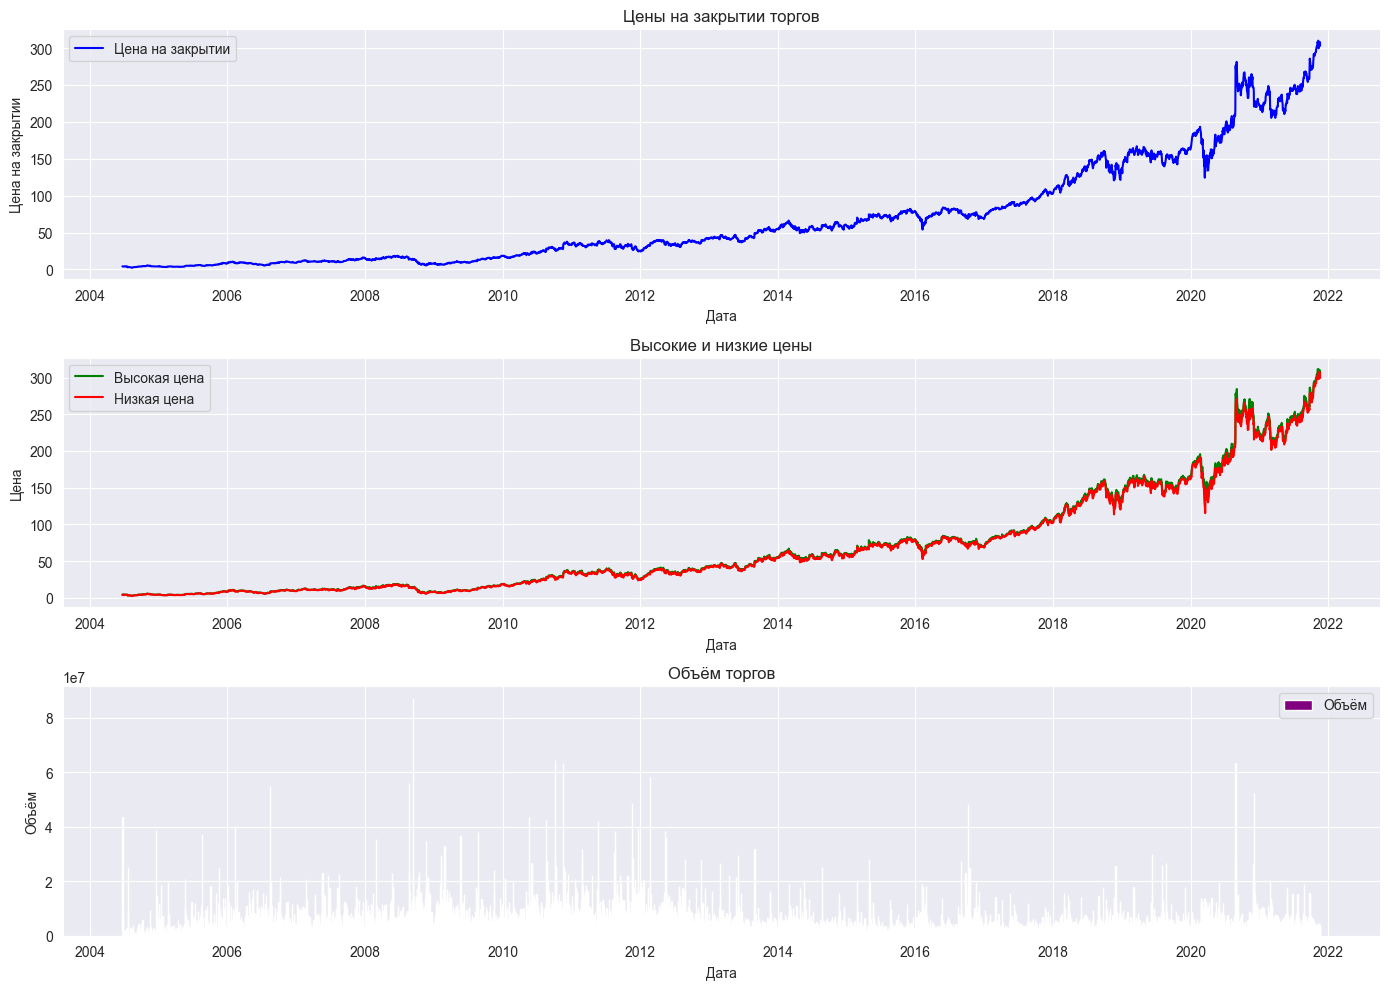

In [7]:
plt.figure(figsize=(14, 10))

# Цены на закрытии торгов
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Цена на закрытии', color='blue')
plt.title('Цены на закрытии торгов')
plt.xlabel('Дата')
plt.ylabel('Цена на закрытии')
plt.legend()

# Высокие и низкие цены
plt.subplot(3, 1, 2)
plt.plot(df.index, df['High'], label='Высокая цена', color='green')
plt.plot(df.index, df['Low'], label='Низкая цена', color='red')
plt.title('Высокие и низкие цены')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# График объема торгов
plt.subplot(3, 1, 3)
plt.bar(df.index, df['Volume'], label='Объём', color='purple')
plt.title('Объём торгов')
plt.xlabel('Дата')
plt.ylabel('Объём')
plt.legend()

plt.tight_layout()
plt.show()

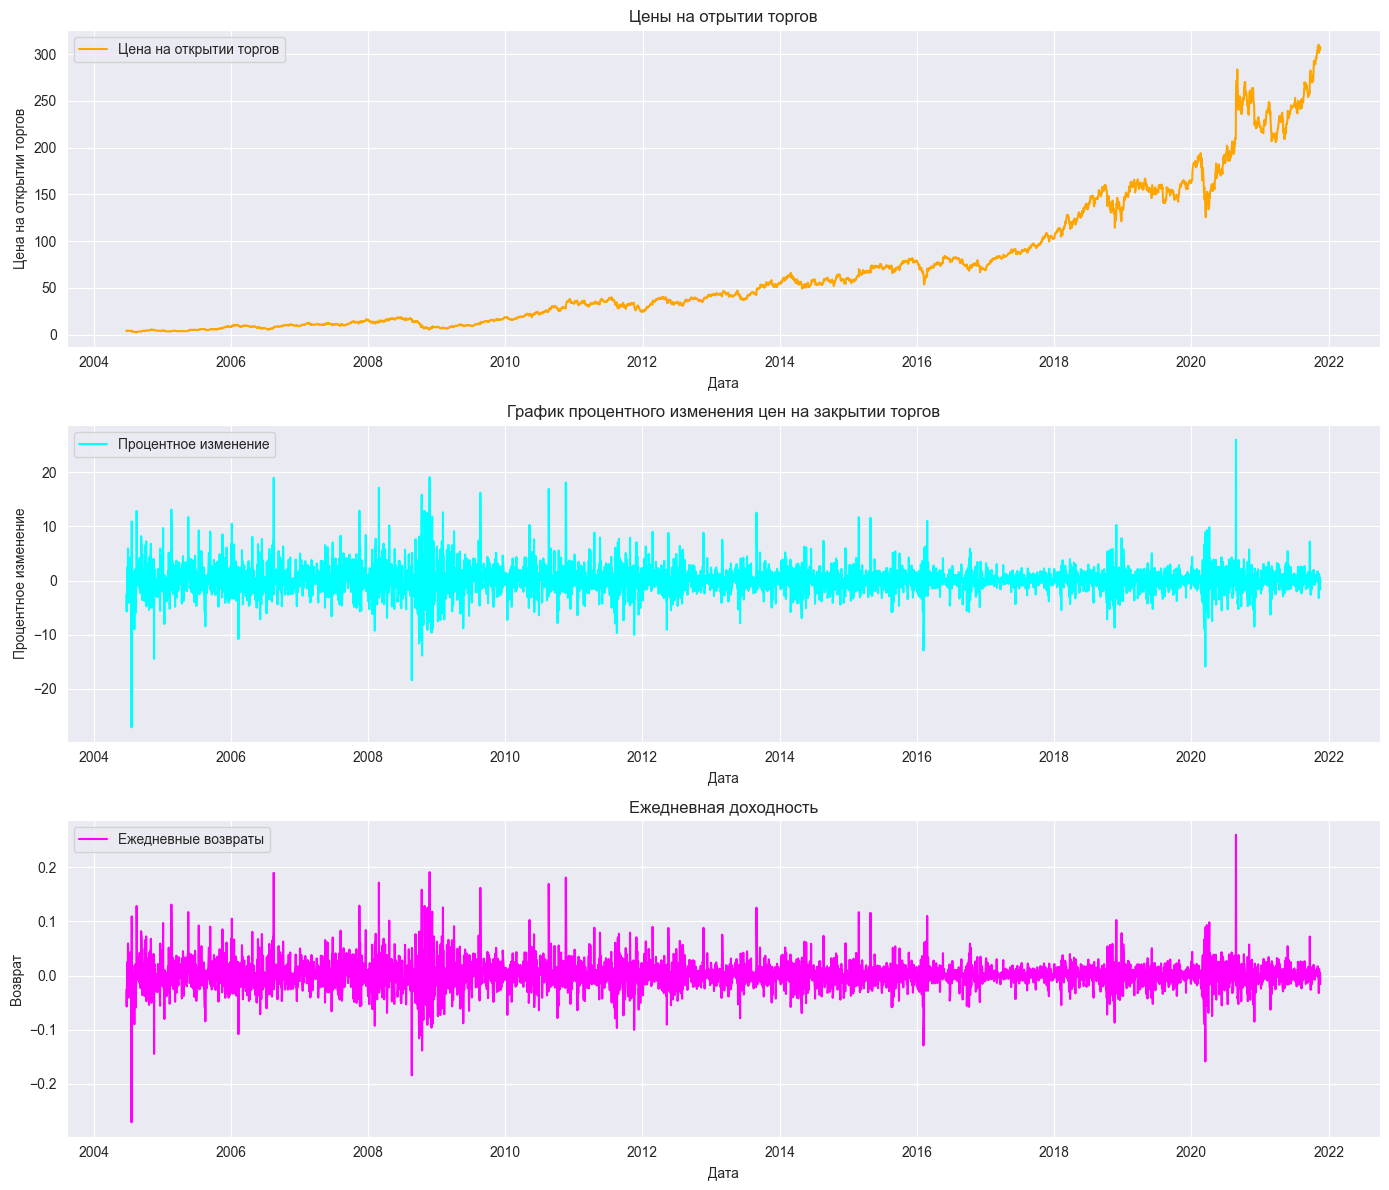

In [10]:
plt.figure(figsize=(14, 12))

# График цен на отрытии торгов
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Open'], label='Цена на открытии торгов', color='orange')
plt.title('Цены на отрытии торгов')
plt.xlabel('Дата')
plt.ylabel('Цена на открытии торгов')
plt.legend()

# График процентного изменения цен на закрытии торгов
percentage_change = df['Close'].pct_change() * 100
plt.subplot(3, 1, 2)
plt.plot(df.index, percentage_change, label='Процентное изменение', color='cyan')
plt.title('График процентного изменения цен на закрытии торгов')
plt.xlabel('Дата')
plt.ylabel('Процентное изменение')
plt.legend()

# График ежедневных возвратов
daily_returns = df['Close'].pct_change()
plt.subplot(3, 1, 3)
plt.plot(df.index, daily_returns, label='Ежедневные возвраты', color='magenta')
plt.title('Ежедневная доходность')
plt.xlabel('Дата')
plt.ylabel('Возврат')
plt.legend()

plt.tight_layout()
plt.show()

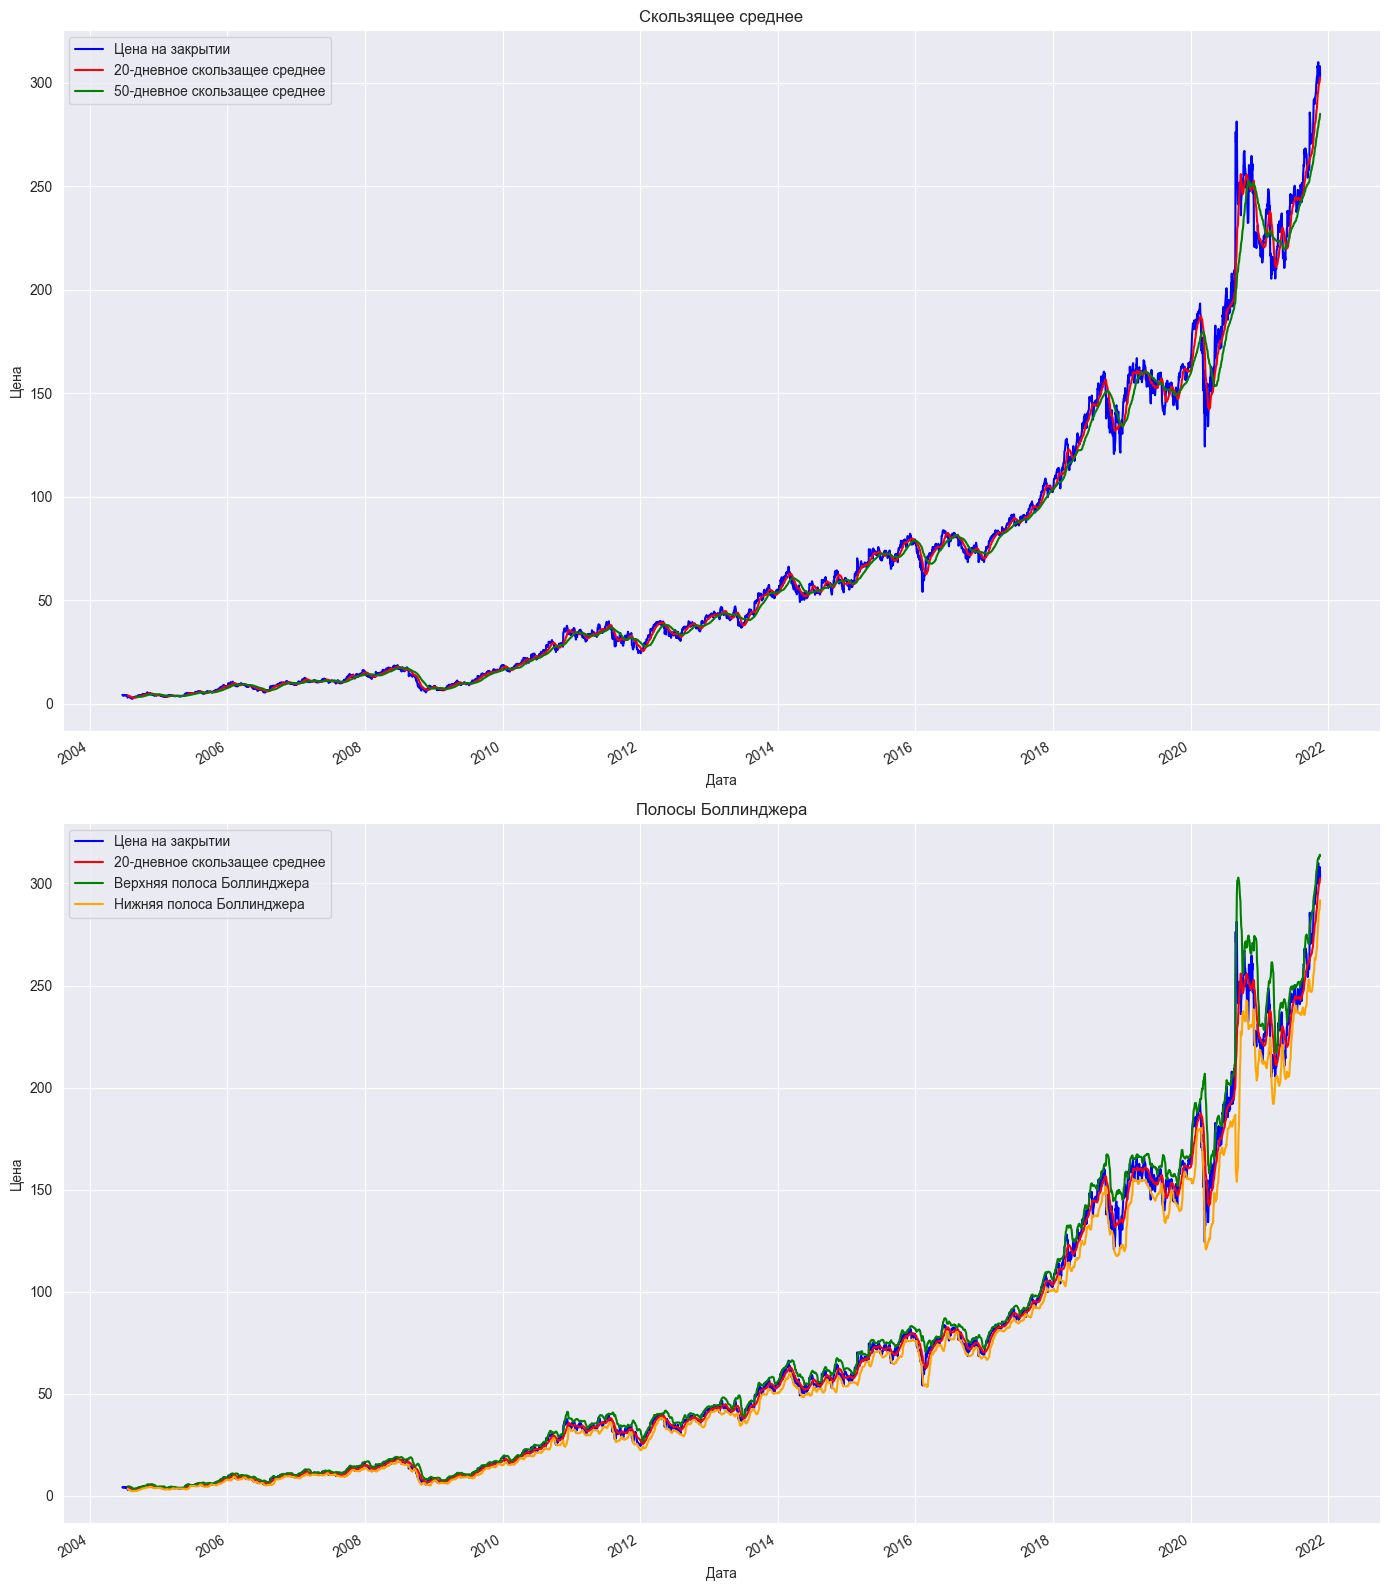

In [11]:
plt.figure(figsize=(14, 16))

# Построение скользящих средних
plt.subplot(2, 1, 1)
df['Close'].plot(label='Цена на закрытии', color='blue')
df['Close'].rolling(window=20).mean().plot(label='20-дневное скользащее среднее', color='red')
df['Close'].rolling(window=50).mean().plot(label='50-дневное скользащее среднее', color='green')
plt.title('Скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# Построение полос Боллинджера
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()

upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)

plt.subplot(2, 1, 2)
df['Close'].plot(label='Цена на закрытии', color='blue')
rolling_mean.plot(label='20-дневное скользащее среднее', color='red')
upper_band.plot(label='Верхняя полоса Боллинджера', color='green')
lower_band.plot(label='Нижняя полоса Боллинджера', color='orange')
plt.title('Полосы Боллинджера')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Тепловая карта корреляции')

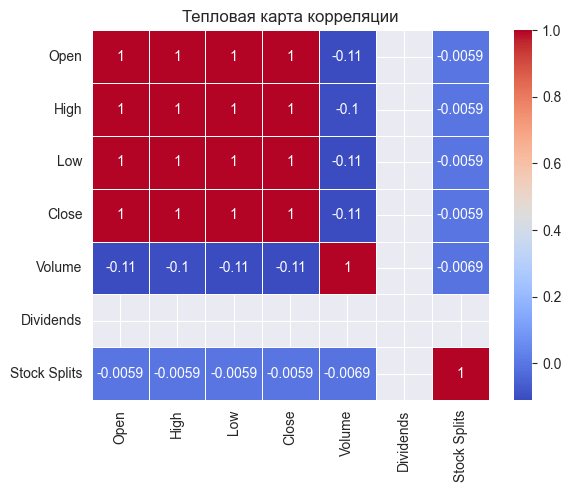

In [12]:
# Тепловая карта корреляции
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Тепловая карта корреляции')

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']])
df_scaled = pd.DataFrame(df_scaled, columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
df_scaled['Date'] = df.index
df_scaled.set_index('Date', inplace=True)

# Создадим класс DQN

In [14]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        """
        Инициализация агента.

        Параметры:
        - state_size: Размер пространства состояний
        - action_size: Размер пространства действий
        """
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(
            maxlen=2000)  # Опыт агента (последовательность состояний, действий, вознаграждений и следующих состояний)
        self.gamma = 0.95  # Коэффициент дисконтирования для оценки будущих вознаграждений
        self.epsilon = 1.0  # Исследовательская стратегия: вероятность выбора случайного действия
        self.epsilon_decay = 0.995  # Уменьшение epsilon с течением времени для уменьшения исследовательского характера
        self.epsilon_min = 0.01  # Минимальное значение epsilon, чтобы сохранить некоторую степень исследовательского характера
        self.learning_rate = 0.001  # Скорость обучения для оптимизатора Adam
        self.model = self.build_model()  # Создание нейронной сети для оценки Q-функции

    def build_model(self):
        """
        Построение нейронной сети для оценки Q-функции.
        """
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        """
        Запоминание опыта агента.

        Параметры:
        - state: Текущее состояние
        - action: Выбранное действие
        - reward: Полученное вознаграждение
        - next_state: Следующее состояние после выполнения действия
        - done: Флаг завершения эпизода
        """
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """
        Выбор действия на основе текущего состояния.

        Параметры:
        - state: Текущее состояние

        Возвращает:
        Выбранное действие
        """
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)  # Случайное действие с вероятностью epsilon
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])  # Выбор действия с максимальной оценкой Q-функции

    def replay(self, batch_size):
        """
        Обучение агента на случайных мини-пакетах опыта.

        Параметры:
        - batch_size: Размер мини-пакета для обучения
        """
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay  # Уменьшение исследовательского характера с течением времени

In [15]:
# Функция предварительной обработки для состояния
def preprocess_state(state):
    return np.reshape(state, [1, state_size])

In [16]:
state_size = 7  # Количество фичей
action_size = 3  # Покупка, удержание, продажа

In [17]:
agent = DQNAgent(state_size, action_size)

# Трейн нашего агента

In [19]:
from tqdm import tqdm

num_episodes = 10  # Установим желаемое количество эпизодов
batch_size = 32
skip_factor = 5  # Пропускать каждую 5-ю точку данных
print_frequency = 1  # Установис желаемую частоту печати прогресса

for episode in tqdm(range(num_episodes), desc='Training Episodes', unit='episode'):
    for i in range(0, len(df_scaled) - 1, skip_factor):
        state = preprocess_state(np.array([df_scaled.iloc[i].values]))
        next_state = preprocess_state(np.array([df_scaled.iloc[i + 1].values]))
        action = agent.act(state)

        # Создадим простую функцию вознаграждения
        reward = 1 if df['Close'].iloc[i + 1] > df['Close'].iloc[i] else -1
        done = i + skip_factor >= len(
            df_scaled) - 1  # Завершение на последнем шаге или когда пропуск собирается выйти за границы
        agent.remember(state, action, reward, next_state, done)

    agent.replay(batch_size)

print('Training completed.')
'''
- num_episodes: Количество эпизодов, в течение которых будет происходить обучение.
- batch_size: Размер мини-пакета для обновления весов нейронной сети.
- skip_factor: Шаг для пропуска данных при формировании опыта агента.
- print_frequency: Частота печати прогресса обучения.

Внутри цикла обучения проходит по эпизодам, а затем по данным с учетом заданного skip_factor.
Для каждой точки данных определяется текущее и следующее состояние, агент выбирает действие и запоминает опыт.
Простая функция вознаграждения основана на изменении цены закрытия (Close) между текущим и следующим временным шагом.
Обучение происходит вызовом метода replay агента, который использует случайные мини-пакеты из запомненного опыта.
В конце обучения выводится сообщение о завершении.
'''

Training Episodes:   0%|          | 0/10 [00:00<?, ?episode/s]

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


Training Episodes:  10%|█         | 1/10 [00:09<01:25,  9.47s/episode]

1/1 [==============================] - 0s 27ms/step


Training Episodes:  20%|██        | 2/10 [00:18<01:13,  9.21s/episode]

1/1 [==============================] - 0s 27ms/step


Training Episodes:  30%|███       | 3/10 [00:27<01:03,  9.01s/episode]

1/1 [==============================] - 0s 27ms/step


Training Episodes:  40%|████      | 4/10 [00:35<00:52,  8.81s/episode]

1/1 [==============================] - 0s 30ms/step


Training Episodes:  50%|█████     | 5/10 [00:44<00:44,  8.84s/episode]

1/1 [==============================] - 0s 27ms/step


Training Episodes:  60%|██████    | 6/10 [00:54<00:37,  9.28s/episode]

1/1 [==============================] - 0s 29ms/step


Training Episodes:  70%|███████   | 7/10 [01:05<00:29,  9.83s/episode]

1/1 [==============================] - 0s 27ms/step


Training Episodes:  80%|████████  | 8/10 [01:16<00:20, 10.27s/episode]

1/1 [==============================] - 0s 30ms/step


Training Episodes:  90%|█████████ | 9/10 [01:26<00:10, 10.15s/episode]

1/1 [==============================] - 0s 28ms/step


Training Episodes: 100%|██████████| 10/10 [01:36<00:00,  9.68s/episode]

Training completed.


'\n- num_episodes: Количество эпизодов, в течение которых будет происходить обучение.\n- batch_size: Размер мини-пакета для обновления весов нейронной сети.\n- skip_factor: Шаг для пропуска данных при формировании опыта агента.\n- print_frequency: Частота печати прогресса обучения.\n\nВнутри цикла обучения проходит по эпизодам, а затем по данным с учетом заданного skip_factor.\nДля каждой точки данных определяется текущее и следующее состояние, агент выбирает действие и запоминает опыт.\nПростая функция вознаграждения основана на изменении цены закрытия (Close) между текущим и следующим временным шагом.\nОбучение происходит вызовом метода replay агента, который использует случайные мини-пакеты из запомненного опыта.\nВ конце обучения выводится сообщение о завершении.\n'

# Проведем оценку обученного агента

In [20]:
state = preprocess_state(np.array([df_scaled.iloc[0].values]))  # Инициализация начального состояния
total_reward = 0  # Инициализация суммарного вознаграждения для оценки

for i in range(len(df_scaled) - 1):
    action = agent.act(state)  # Агент выбирает действие на основе текущего состояния
    next_state = preprocess_state(np.array([df_scaled.iloc[i + 1].values]))  # Вычисление следующего состояния

    # Предполагаем простую функцию вознаграждения для оценки
    reward = 1 if df['Close'].iloc[i + 1] > df['Close'].iloc[i] else -1
    done = i == len(df_scaled) - 2  # Завершение на последнем шаге оценки
    agent.remember(state, action, reward, next_state, done)  # Запоминание опыта для будущего обучения
    total_reward += reward  # Обновление суммарного вознаграждения
    state = next_state  # Обновление текущего состояния

print(f'Total Evaluation Reward: {total_reward}')

1/1 [==============================] - 0s 27ms/step
Total Evaluation Reward: 122


# Строим графики

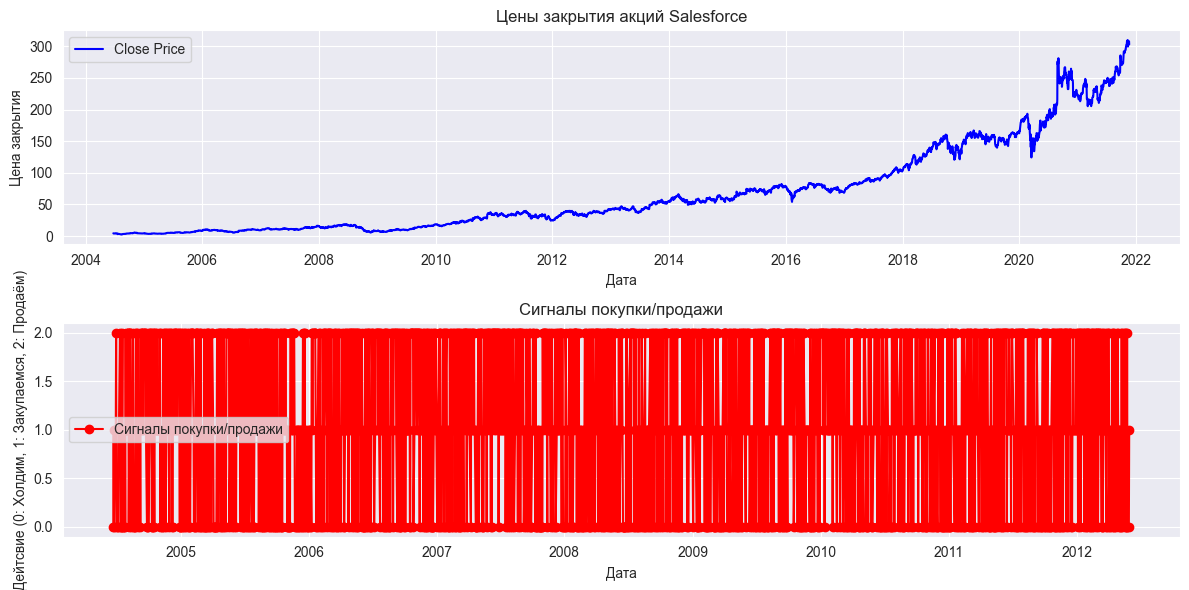

In [21]:
buy_sell_actions = [action[1] for action in agent.memory]

plt.figure(figsize=(12, 6))

# График цен на закрытии торгов
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Цены закрытия акций Salesforce')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index[:-1][:len(buy_sell_actions)], buy_sell_actions, label='Сигналы покупки/продажи', marker='o', color='red')
plt.title('Сигналы покупки/продажи')
plt.xlabel('Дата')
plt.ylabel('Дейтсвие (0: Холдим, 1: Закупаемся, 2: Продаём)')
plt.legend()

plt.tight_layout()
plt.show()